In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import datetime as dt
from datetime import timedelta
from statsmodels.tsa.api import Holt
from statsmodels.tsa.arima_model import ARIMA
import warnings
warnings.filterwarnings('ignore')



In [2]:
covid_world_dataset = pd.read_csv("covid19_world_.csv")



## Extracting india time series dataset from world dataset 

In [3]:
filterIndia = covid_world_dataset['Country/Region'] == 'India'


In [4]:
india_dataset = covid_world_dataset[filterIndia]

In [5]:
india_dataset.head(30)

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
430,431,01/30/2020,NaN,India,1/30/20 16:00,1.0,0.0,0.0
491,492,01/31/2020,NaN,India,1/31/2020 23:59,1.0,0.0,0.0
547,548,02/01/2020,NaN,India,1/31/2020 8:15,1.0,0.0,0.0
607,608,02/02/2020,NaN,India,2020-02-02T06:03:08,2.0,0.0,0.0
672,673,02/03/2020,NaN,India,2020-02-03T21:43:02,3.0,0.0,0.0
740,741,02/04/2020,NaN,India,2020-02-03T21:43:02,3.0,0.0,0.0
810,811,02/05/2020,NaN,India,2020-02-03T21:43:02,3.0,0.0,0.0
881,882,02/06/2020,NaN,India,2020-02-03T21:43:02,3.0,0.0,0.0
954,955,02/07/2020,NaN,India,2020-02-03T21:43:02,3.0,0.0,0.0
1026,1027,02/08/2020,NaN,India,2020-02-03T21:43:02,3.0,0.0,0.0


#### Preprocessing and data cleaning the subset (**India**) of  the data  which is extracted from world dataset

In [6]:
print("checking no of rows and columns",india_dataset.shape)
print(india_dataset.isnull().sum())

checking no of rows and columns (86, 8)
SNo                 0
ObservationDate     0
Province/State     86
Country/Region      0
Last Update         0
Confirmed           0
Deaths              0
Recovered           0
dtype: int64


In [7]:
india_dataset.drop(["Province/State","Last Update"],axis=1,inplace=True)



In [8]:
india_dataset.head()

,SNo,ObservationDate,Country/Region,Confirmed,Deaths,Recovered
430,431,01/30/2020,India,1.0,0.0,0.0
491,492,01/31/2020,India,1.0,0.0,0.0
547,548,02/01/2020,India,1.0,0.0,0.0
607,608,02/02/2020,India,2.0,0.0,0.0
672,673,02/03/2020,India,3.0,0.0,0.0


In [9]:
print("checking no of rows and columns",india_dataset.shape)
print(india_dataset.isnull().sum())

checking no of rows and columns (86, 6)
SNo                0
ObservationDate    0
Country/Region     0
Confirmed          0
Deaths             0
Recovered          0
dtype: int64


In [10]:
india_dataset["Date"] = pd.to_datetime(india_dataset["ObservationDate"])
datewise = india_dataset.groupby(["Date"]).agg({"Confirmed":"sum","Recovered":"sum","Deaths":"sum"})
india_dataset.drop(['ObservationDate','SNo'] ,1,inplace=True)
india_dataset.set_index('Date')

,Country/Region,Confirmed,Deaths,Recovered
Date,,,,
2020-01-30,India,1.0,0.0,0.0
2020-01-31,India,1.0,0.0,0.0
2020-02-01,India,1.0,0.0,0.0
2020-02-02,India,2.0,0.0,0.0
2020-02-03,India,3.0,0.0,0.0
...,...,...,...,...
2020-04-20,India,18539.0,592.0,3273.0
2020-04-21,India,20080.0,645.0,3975.0
2020-04-22,India,21370.0,681.0,4370.0


In [11]:
print("Basic insight from data")
print("Total number of Confirmed cases in india",datewise["Confirmed"].iloc[-1])
print("Total number of Recovered cases in india",datewise["Recovered"].iloc[-1])
print("Total number of Death cases around in india",datewise["Deaths"].iloc[-1])
print("Total number of Active cases around in india",(datewise["Confirmed"].iloc[-1]-datewise["Recovered"].iloc[-1]-datewise["Deaths"].iloc[-1]))
print("Total number of Closed cases around india",(datewise["Recovered"].iloc[-1]+datewise["Deaths"].iloc[-1]))

Basic insight from data
Total number of Confirmed cases in india 24530.0
Total number of Recovered cases in india 5498.0
Total number of Death cases around in india 780.0
Total number of Active cases around in india 18252.0
Total number of Closed cases around india 6278.0


In [12]:
india_dataset.head()


,Country/Region,Confirmed,Deaths,Recovered,Date
430,India,1.0,0.0,0.0,2020-01-30
491,India,1.0,0.0,0.0,2020-01-31
547,India,1.0,0.0,0.0,2020-02-01
607,India,2.0,0.0,0.0,2020-02-02
672,India,3.0,0.0,0.0,2020-02-03


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
        85]),
 [Text(0, 0, '2020-01-30'),
  Text(1, 0, '2020-01-31'),
  Text(2, 0, '2020-02-01'),
  Text(3, 0, '2020-02-02'),
  Text(4, 0, '2020-02-03'),
  Text(5, 0, '2020-02-04'),
  Text(6, 0, '2020-02-05'),
  Text(7, 0, '2020-02-06'),
  Text(8, 0, '2020-02-07'),
  Text(9, 0, '2020-02-08'),
  Text(10, 0, '2020-02-09'),
  Text(11, 0, '2020-02-10'),
  Text(12, 0, '2020-02-11'),
  Text(13, 0, '2020-02-12'),
  Text(14, 0, '2020-02-13'),
  Text(15, 0, '2020-02-14'),
  Text(16, 0, '2020-02-15'),
  Text(17, 0, '2020-02-16'),
  Text(18, 0, '2020-02-17'),
  Text(19, 0, '2020-02-18'),
  Text(20, 0, '2020-02-19'),
  Text(

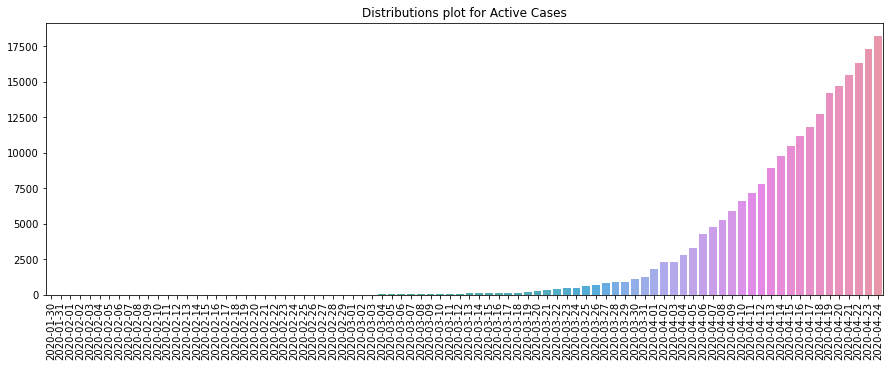

In [13]:
plt.figure(figsize=(15,5))
sns.barplot(x=datewise.index.date,y=datewise["Confirmed"]-datewise["Recovered"]-datewise["Deaths"])
plt.title("Distributions plot for Active Cases")
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
        85]),
 [Text(0, 0, '2020-01-30'),
  Text(1, 0, '2020-01-31'),
  Text(2, 0, '2020-02-01'),
  Text(3, 0, '2020-02-02'),
  Text(4, 0, '2020-02-03'),
  Text(5, 0, '2020-02-04'),
  Text(6, 0, '2020-02-05'),
  Text(7, 0, '2020-02-06'),
  Text(8, 0, '2020-02-07'),
  Text(9, 0, '2020-02-08'),
  Text(10, 0, '2020-02-09'),
  Text(11, 0, '2020-02-10'),
  Text(12, 0, '2020-02-11'),
  Text(13, 0, '2020-02-12'),
  Text(14, 0, '2020-02-13'),
  Text(15, 0, '2020-02-14'),
  Text(16, 0, '2020-02-15'),
  Text(17, 0, '2020-02-16'),
  Text(18, 0, '2020-02-17'),
  Text(19, 0, '2020-02-18'),
  Text(20, 0, '2020-02-19'),
  Text(

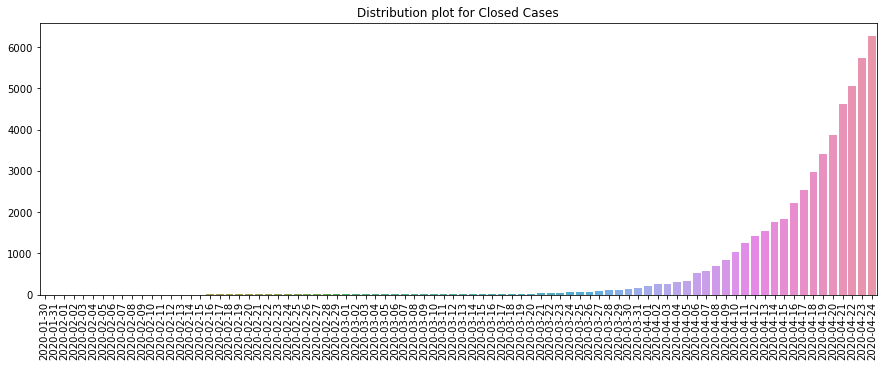

In [14]:
plt.figure(figsize=(15,5))
sns.barplot(x=datewise.index.date,y=datewise["Recovered"]+datewise["Deaths"])
plt.title("Distribution plot for Closed Cases")
plt.xticks(rotation=90)

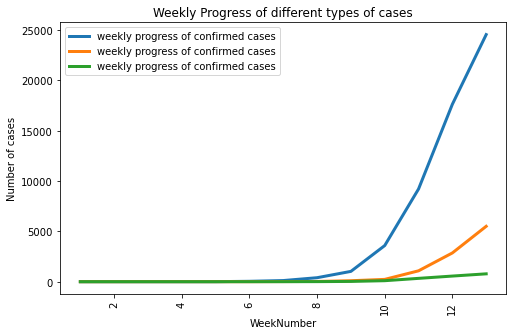

In [15]:
datewise["WeekofYear"] = datewise.index.weekofyear
week_num = []
weekwise_confirmed = []
weekwise_recovered = []
weekwise_deaths = []
w = 1
for i in list(datewise["WeekofYear"].unique()):
    weekwise_confirmed.append(datewise[datewise["WeekofYear"]==i]["Confirmed"].iloc[-1])
    weekwise_recovered.append(datewise[datewise["WeekofYear"]==i]["Recovered"].iloc[-1])
    weekwise_deaths.append(datewise[datewise["WeekofYear"]==i]["Deaths"].iloc[-1])
    week_num.append(w)
    w=w+1
plt.figure(figsize=(8,5))
plt.plot(week_num,weekwise_confirmed,label="weekly progress of confirmed cases",linewidth=3)
plt.plot(week_num,weekwise_recovered,label="weekly progress of confirmed cases",linewidth=3)
plt.plot(week_num,weekwise_deaths,label="weekly progress of confirmed cases",linewidth=3)
plt.xlabel("WeekNumber")
plt.ylabel("Number of cases")
plt.title("Weekly Progress of different types of cases")
plt.legend()
plt.xticks(rotation=90)
plt.show()

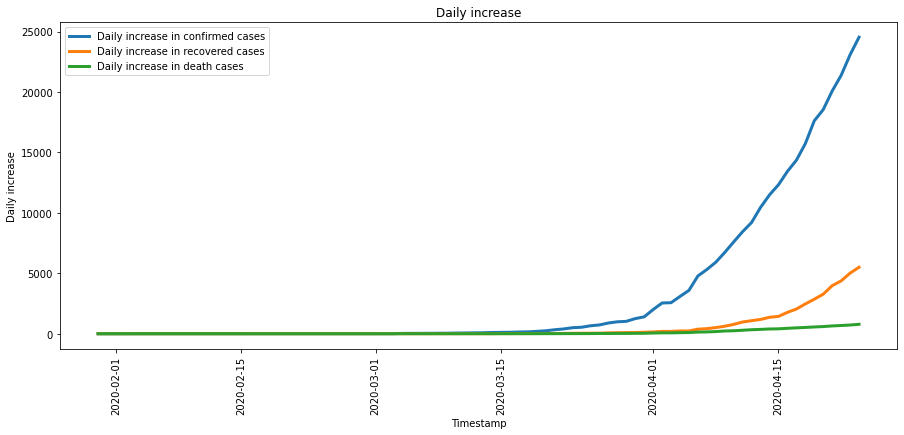

In [16]:
plt.figure(figsize=(15,6))
plt.plot(datewise["Confirmed"],label="Daily increase in confirmed cases",linewidth=3)
plt.plot(datewise["Recovered"],label="Daily increase in recovered cases",linewidth=3)
plt.plot(datewise["Deaths"],label="Daily increase in death cases",linewidth=3)
plt.xlabel("Timestamp")
plt.ylabel("Daily increase")
plt.title("Daily increase")
plt.legend()
plt.xticks(rotation=90)
plt.show()

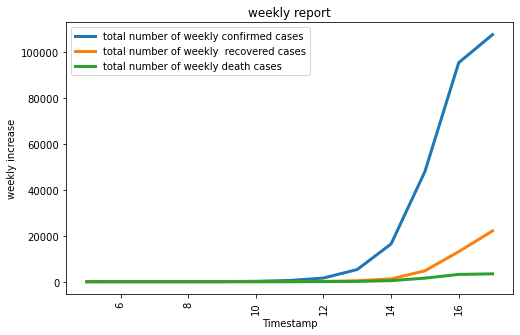

In [17]:
weekwise=datewise.groupby(["WeekofYear"]).sum()
weekwise.head()
plt.figure(figsize=(8,5))
plt.plot(weekwise["Confirmed"],label="total number of weekly confirmed cases",linewidth=3)
plt.plot(weekwise["Recovered"],label="total number of weekly  recovered cases",linewidth=3)
plt.plot(weekwise["Deaths"],label="total number of weekly death cases",linewidth=3)
plt.title("weekly report")
plt.xlabel("Timestamp")
plt.ylabel("weekly increase")
plt.legend()
plt.xticks(rotation=90)
plt.show()

In [18]:
print("weekwise report")
weekwise

weekwise report


,Confirmed,Recovered,Deaths
WeekofYear,,,
5,5.0,0.0,0.0
6,21.0,0.0,0.0
7,21.0,3.0,0.0
8,21.0,21.0,0.0
9,21.0,21.0,0.0
10,172.0,21.0,0.0
11,531.0,36.0,8.0
12,1581.0,123.0,28.0
13,5317.0,414.0,123.0


In [19]:
datewise["Days Since"]=datewise.index-datewise.index[0]
datewise["Days Since"] = datewise["Days Since"].dt.days
train_ml = datewise.iloc[:int(datewise.shape[0]*0.85)]
valid_ml = datewise.iloc[:int(datewise.shape[0]*0.85)]


In [20]:

holt=Holt(np.asarray(train_ml["Confirmed"])).fit(smoothing_level=0.2,smoothing_trend=0.2)
y_pred = valid_ml.copy()
y_pred["Holt"]=holt.forecast(len(valid_ml))

In [21]:

holt_new_date=[]
holt_new_prediction=[]
for i in range(1,18):
   holt_new_date.append(datewise.index[-1]+timedelta(days=i))
   holt_new_prediction.append(holt.forecast((len(valid_ml)+i))[-1])
model_predictions=pd.DataFrame(zip(holt_new_date),columns = ["Dates"])
model_predictions["Holts Linear Model Prediction"]=holt_new_prediction
model_predictions.head(15)


,Dates,Holts Linear Model Prediction
0,2020-04-25,54371.997965
1,2020-04-26,55009.102419
2,2020-04-27,55646.206873
3,2020-04-28,56283.311326
4,2020-04-29,56920.415780
5,2020-04-30,57557.520234
6,2020-05-01,58194.624687
7,2020-05-02,58831.729141
8,2020-05-03,59468.833594
9,2020-05-04,60105.938048


In [22]:
!pip install pmdarima

In [23]:
import pmdarima as pm

In [24]:
arima = pm.auto_arima(india_dataset['Confirmed'], seasonal=False)
arima_forecast = arima.predict(17)

In [25]:
model_predictions["arima_forecast"]=arima_forecast
model_predictions.head(15)

,Dates,Holts Linear Model Prediction,arima_forecast
0,2020-04-25,54371.997965,26202.933354
1,2020-04-26,55009.102419,27768.277223
2,2020-04-27,55646.206873,29351.652940
3,2020-04-28,56283.311326,30953.060504
4,2020-04-29,56920.415780,32572.499916
5,2020-04-30,57557.520234,34209.971176
6,2020-05-01,58194.624687,35865.474282
7,2020-05-02,58831.729141,37539.009237
8,2020-05-03,59468.833594,39230.576039
9,2020-05-04,60105.938048,40940.174688


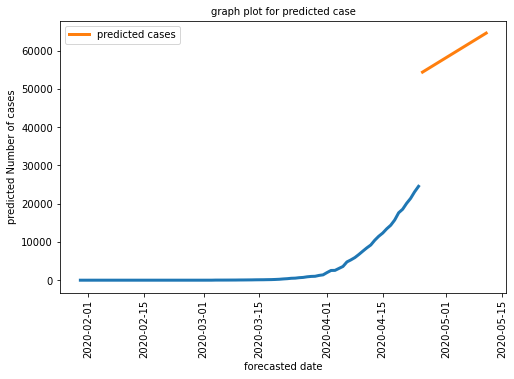

In [30]:
predicted_value=model_predictions["Holts Linear Model Prediction"]
forecastdates=model_predictions["Dates"]
plt.figure(figsize=(8,5))
plt.plot(india_dataset["Date"],india_dataset["Confirmed"],linewidth=3,)
plt.plot(forecastdates,predicted_value,label="predicted cases",linewidth=3,)
plt.xlabel("forecasted date",fontsize=10)
plt.ylabel("predicted Number of cases",fontsize=10)
plt.title("graph plot for predicted case",fontsize=10)
plt.legend()
plt.xticks(rotation=90)
plt.show()

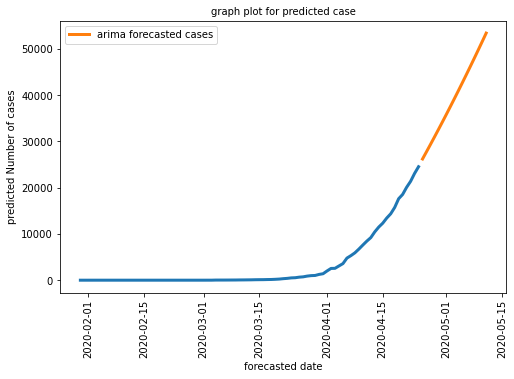

In [31]:
predicted_value=model_predictions["arima_forecast"]
forecastdates=model_predictions["Dates"]
plt.figure(figsize=(8,5))
plt.plot(india_dataset["Date"],india_dataset["Confirmed"],linewidth=3,)
plt.plot(forecastdates,predicted_value,label="arima forecasted cases",linewidth=3,)
plt.xlabel("forecasted date",fontsize=10)
plt.ylabel("predicted Number of cases",fontsize=10)
plt.title("graph plot for predicted case",fontsize=10)
plt.legend()
plt.xticks(rotation=90)
plt.show()

In [28]:
 actualdata= pd.read_csv("actualdata.csv")

In [29]:
  actualdata

,iso_code,continent,location,date,total_cases
0,IND,Asia,India,25-04-2020,26283
1,IND,Asia,India,26-04-2020,27890
2,IND,Asia,India,27-04-2020,29451
3,IND,Asia,India,28-04-2020,31324
4,IND,Asia,India,29-04-2020,33062
5,IND,Asia,India,30-04-2020,34863
6,IND,Asia,India,01-05-2020,37257
7,IND,Asia,India,02-05-2020,39699
8,IND,Asia,India,03-05-2020,42505
9,IND,Asia,India,04-05-2020,46437


### <p style='text-align: center;'> checking with actual data </p>

| date | actual | holt | arima |
|------|--------|------|-------|
|09-05-2020|62808|63291|49578|

In [37]:
actual_value=62808
predicted=63291


In [40]:
def accuracy (acvalue,pvalue):
 return acvalue/pvalue*100

In [41]:
accuracy(actual_value,predicted_v

0     239.698354
1     226.186160
2     213.984542
3     202.913699
4     192.825237
5     183.595595
6     175.121064
7     167.313952
8     160.099612
9     153.414099
10    147.202322
11    141.416565
12    136.015289
13    130.962170
14    126.225301
15    121.776543
16    117.590987
Name: arima_forecast, dtype: float64